In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy, pandas and matplotlib packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Retrieve data from Source file
loan_details_raw=pd.read_csv('loan.csv')
loan_details_raw.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Understanding Dataset & Cleaning it.

In [3]:
print("Dataset size: ",loan_details_raw.shape)
print("Dataset Info is below : \n")
loan_details_raw.info()

Dataset size:  (39717, 111)
Dataset Info is below : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Excluding Collumns with Null values for all rows
loan_details_cleansed=loan_details_raw.dropna(axis=1,how='all')
print(loan_details_raw.shape)

(39717, 111)


In [5]:
#Exluding columns with all rows having unique Values
loan_details_cleansed= loan_details_cleansed.loc[:,loan_details_cleansed.nunique()!=1]
print(loan_details_cleansed.shape)

(39717, 48)


In [6]:
# Excluding columns with over 50 percent null rows
loan_details_cleansed=loan_details_cleansed.loc[:,round(loan_details_cleansed.isnull().sum()/len(loan_details_cleansed)*100,2)<50]
print(loan_details_cleansed.shape)

(39717, 45)


In [7]:
# Excluding columns which are not needed for analysis
drop_columns=['member_id', 'funded_amnt_inv','emp_title','earliest_cr_line','url',
              'total_acc','open_acc','desc','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d',
              'total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt']
loan_details_cleansed=loan_details_cleansed.drop(drop_columns,axis=1)
print(loan_details_cleansed.shape)

(39717, 27)


In [8]:
print(loan_details_cleansed.dtypes)

id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object


In [9]:
# Converting fields into proper datatype
loan_details_cleansed.revol_util=loan_details_cleansed.revol_util.str.rstrip('%').astype('float')
loan_details_cleansed.int_rate=loan_details_cleansed.int_rate.str.rstrip('%').astype('float')

print(loan_details_cleansed.shape)
print(loan_details_cleansed.dtypes)

(39717, 27)
id                        int64
loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
out_prncp               float64
out_prncp_inv           float64
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object


In [10]:
# Excluding 'current' from loan status as they are on-going.
loan_details_cleansed=loan_details_cleansed[loan_details_cleansed.loan_status !='Current']
print(loan_details_cleansed.shape)

(38577, 27)


In [11]:
# Creating  custom defined column for Income and Loan amount ratio
loan_details_cleansed['loan_to_income_ratio']=loan_details_cleansed.funded_amnt*100/loan_details_cleansed.annual_inc

# Creating  custom defined column for Proft/Loss
loan_details_cleansed['profit']=(loan_details_cleansed['total_pymnt'] + loan_details_cleansed['recoveries'] -loan_details_cleansed['funded_amnt'])*100/loan_details_cleansed['funded_amnt']

print(loan_details_cleansed.shape)

(38577, 29)


In [12]:
# Converting employment length & column into a nominal variable
remap_fields = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    }
}

loan_details_cleansed=loan_details_cleansed.replace(remap_fields)

### Data Analysis

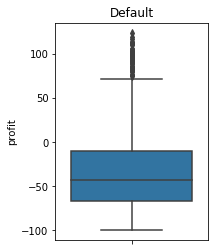

In [13]:
#Relationship of profit with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan_details_cleansed[loan_details_cleansed.loan_status=='Charged Off'].profit)

- #### Observation 1.1: Lending Club makes loss from loans which are "Charged Off", as median is almost -50% & lower and upper quartiles are around -70%, -20% respectively.

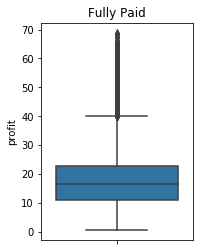

In [14]:
plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan_details_cleansed[loan_details_cleansed.loan_status=='Fully Paid'].profit)
plt.show()

- #### Obeservation 1.2: Lending Club makes profit from fully paid loans, as median of profit is -15% & lower and upper quartiles are nearly 12%, 24% respectively.

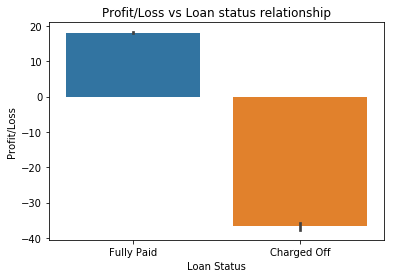

In [15]:
sns.barplot(x='loan_status',y='profit',data=loan_details_cleansed)
plt.xlabel("Loan Status")
plt.ylabel("Profit/Loss")

plt.title("Profit/Loss vs Loan status relationship")
plt.show()

#Below plot is further illustration of the same inference as above 

- #### Profit/Loss Vs. Loan Status graph above concurs with Obeservation 1.1 & 1.2.

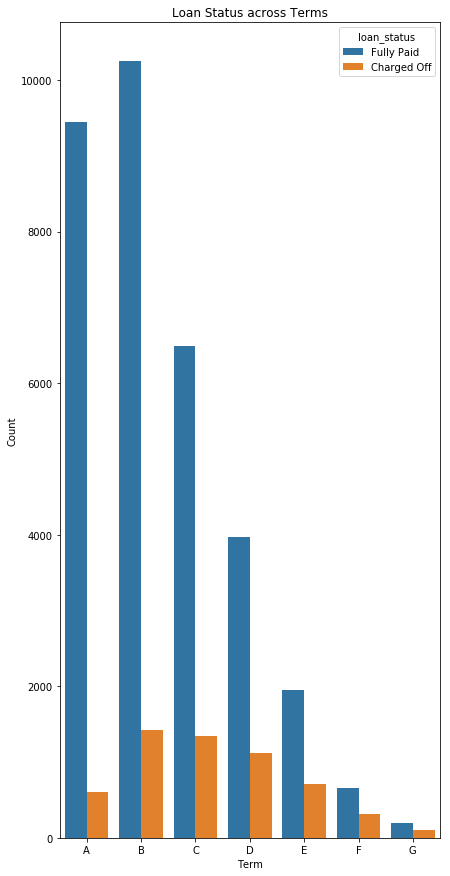

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,2)
sns.countplot('grade',hue='loan_status',data=loan_details_cleansed.sort_values(['grade'], ascending=True, inplace=False))
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Loan Status across Terms")
plt.show()

- #### Obeservation 2: 
    - #### The percentage of charged off loans is in sync with grades. 
    - #### But Count of Charged off loans in B, C, D grades is comparably high. Count of A-graded Charged off loans is almost equal to that of E-grade. So There is some scope of improvement in that area.

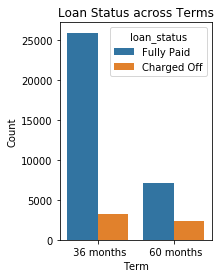

In [17]:
plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan_details_cleansed)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Loan Status across Terms")
plt.show()

#Below illustrates the ratio of Fully paid vs Charged off is better in short terms (36months) vs long terms(60 Months)

- #### Observation 4: Percentage of charged off loans is better in shorter term than loger term.

So Let's compare the profitability of loans across the terms and grade. 
Ideally, higher the risk, higher the reward. Let's verify if it is correct across terms & grades.

Text(0.5,1,'Profit/Loss across Term')

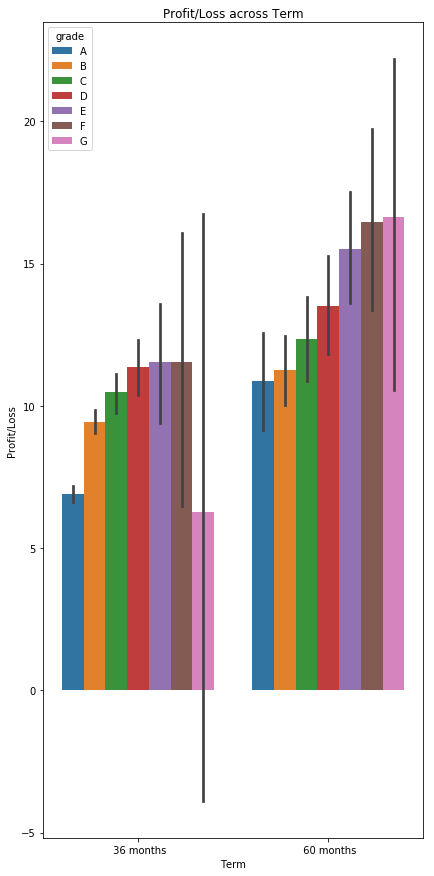

In [18]:
# Barplot Comparison across terms and Profit
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='profit',data=loan_details_cleansed.sort_values(['grade'], ascending=True, inplace=False),hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit/Loss")

plt.title("Profit/Loss across Term")

- #### Observation 5: 
    - Longer term loans carry higher risk, but they are rewarding too. The profitability is also increasing across the grades.
    - However, 36 months G graded loans are not so much rewarding compare to risk these loans are carrying.

Text(0.5,1,'Loan Status Vs Verification Status')

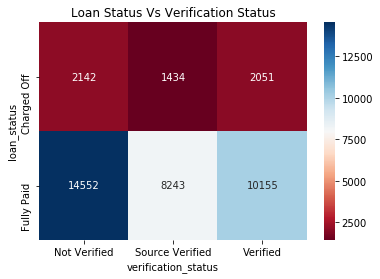

In [19]:
D1= pd.pivot_table(loan_details_cleansed, values='id', index='loan_status', 
                   columns='verification_status', aggfunc='count')
sns.heatmap(D1, cmap="RdBu",annot=True,fmt='g')
plt.title("Loan Status Vs Verification Status")

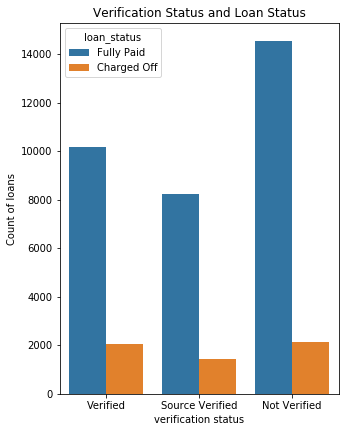

In [20]:
plt.figure(figsize=(5,15))
plt.subplot(2,1,2)
sns.countplot(x='verification_status',hue='loan_status',data=loan_details_cleansed)
plt.ylabel("Count of loans")
plt.xlabel("verification status")
plt.title("Verification Status and Loan Status")
plt.show()

- #### Observation 6: Count of charged-off loans that are verified by LC are higher than that of source verified.
    Surprisingly, there are significantly large number of loans that are not verified. 
    
    Hence, verfication process of Lending Club needs to be reviewed & improved.

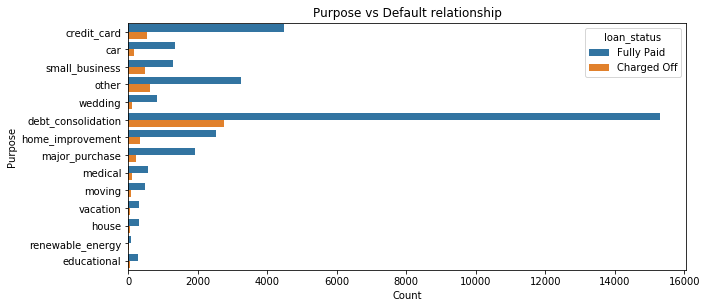

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan_details_cleansed)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()


Clearly, Debt consolidation type is primary customer base of lending club, followed by Credit Card. 
The count of charging off is also higher in same categories.

- #### Segmented Analysis
Let's do segmented Analysis on Charged off loans to identify which category of loans have higher charging off.

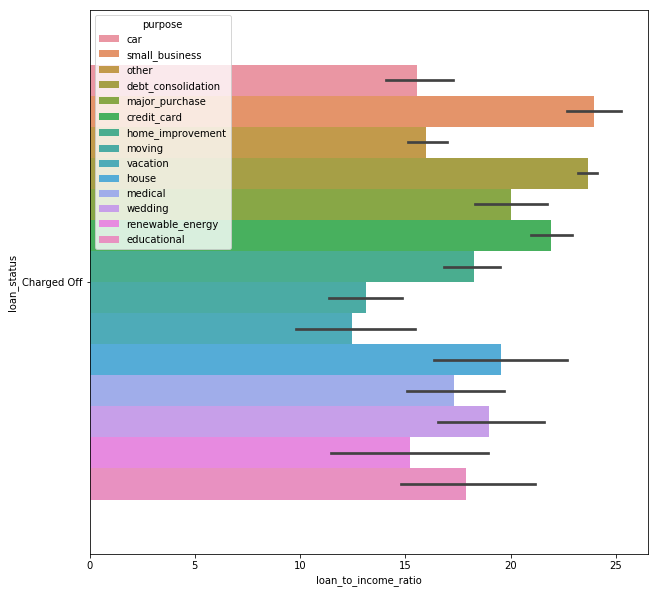

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(y='loan_status',x='loan_to_income_ratio',hue='purpose',data=loan_details_cleansed[loan_details_cleansed.loan_status=='Charged Off'])

plt.show()

- #### Observation 5: Top 3 categories in charged off loans having higher loan-to-income ratio are -
    1. Small Business
    2. Debt consolidation
    3. Credit Card

So these segments requires special attention while issueing new loans.

Let's Analyze the data across the State.

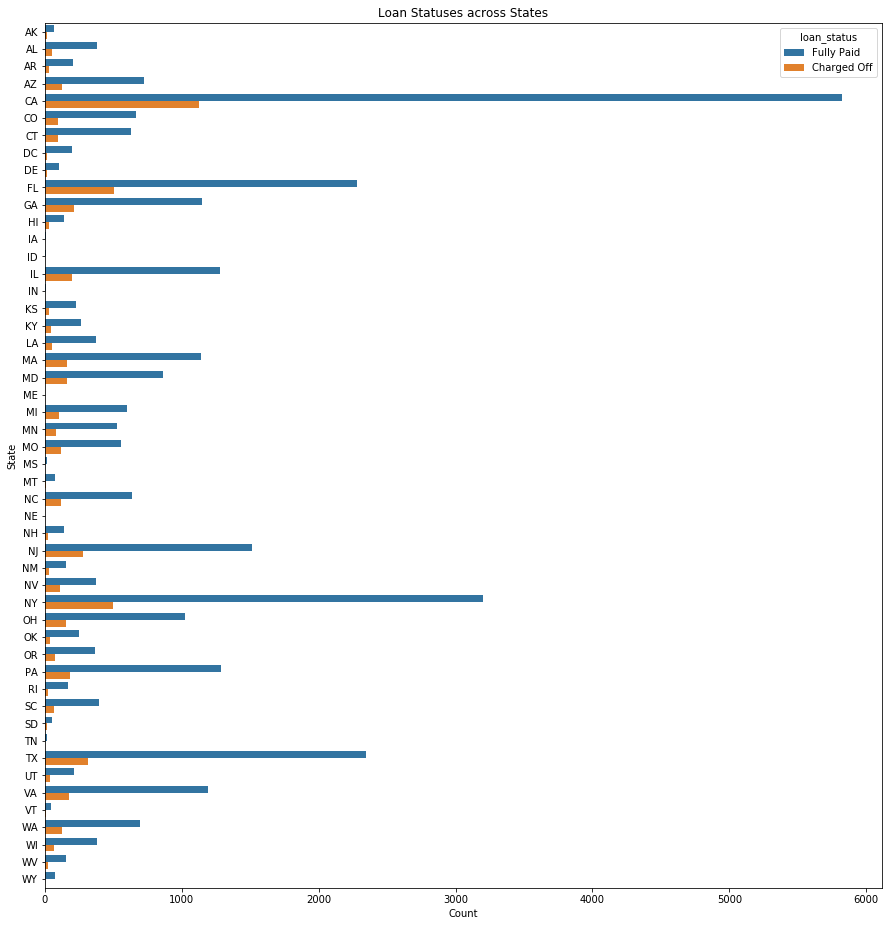

In [23]:
plt.figure(figsize=(15,35))
plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_details_cleansed.sort_values(['addr_state'], ascending=True, inplace=False))
plt.ylabel("State")
plt.xlabel("Count")
plt.title("Loan Statuses across States")
plt.show()


- #### Top 5 states States where Lending Club has its most customer base -
    - California
    - New York
    - Florida
    - Texas
    - New Jersey.

Text(0.5,1,'Profit vs State relationship')

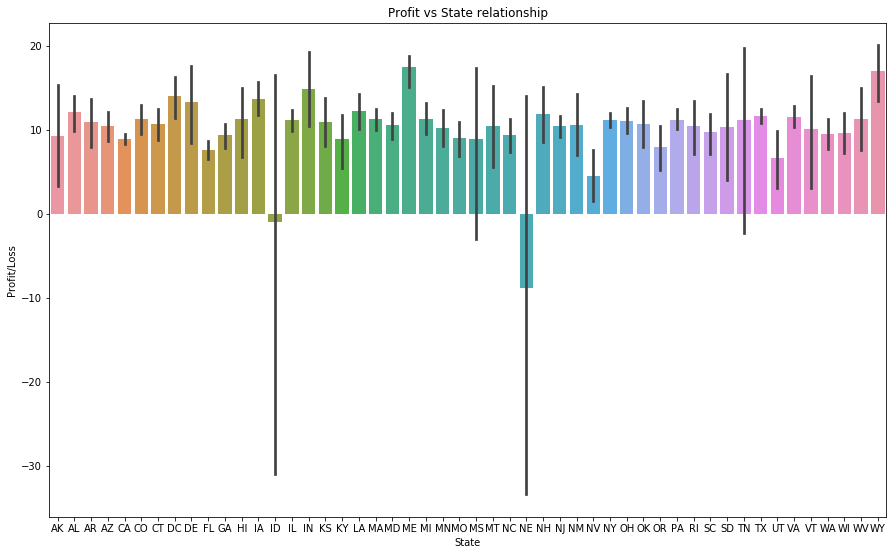

In [24]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
sns.barplot(x='addr_state',y='profit',data=loan_details_cleansed.sort_values(['addr_state'], ascending=True, inplace=False))
plt.ylabel("Profit/Loss")
plt.xlabel("State")

plt.title("Profit vs State relationship")

#### Though Nevada(NE) and Idaho (ID) have higher losses and Wyomming (WY) & Maine (ME) has higher profits, loan count in these states are too small to make any assumption.

<Figure size 1080x1080 with 0 Axes>

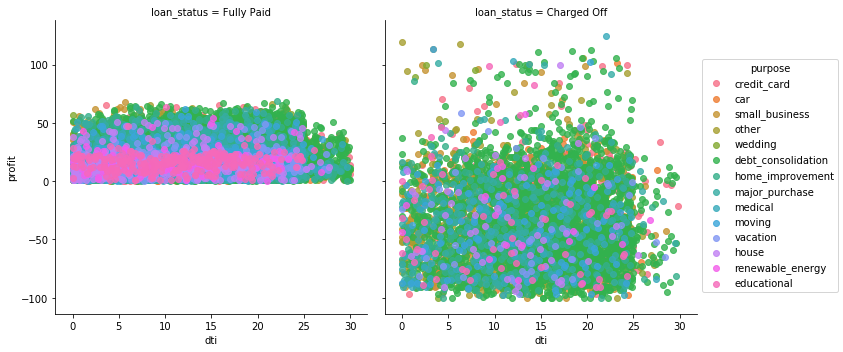

<Figure size 1080x1080 with 0 Axes>

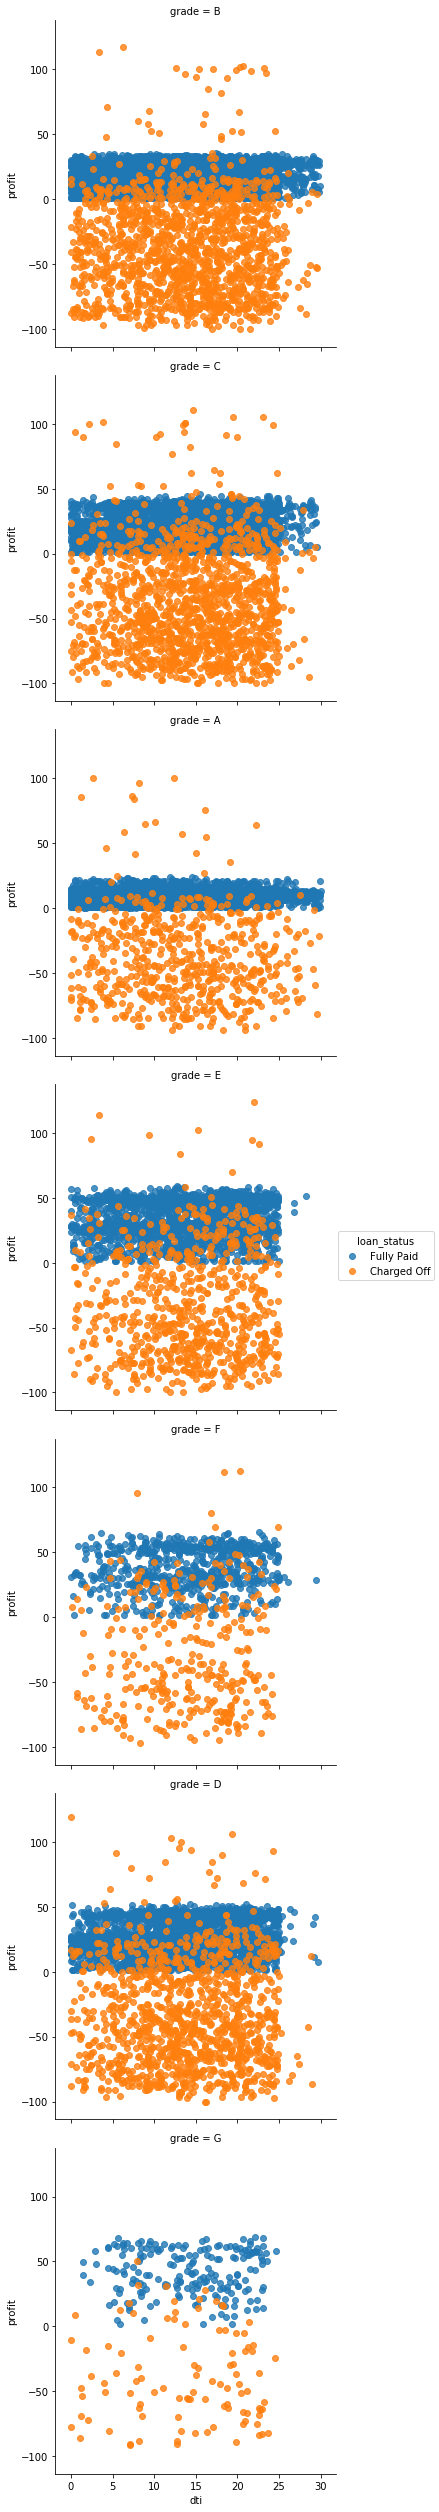

In [25]:
# Trying to see influence of loan amount and DTI on profitability of individual loans

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='profit',col='loan_status',hue='purpose',fit_reg=False,data=loan_details_cleansed)
plt.show()


plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='profit',row='grade',hue='loan_status',fit_reg=False,data=loan_details_cleansed)

plt.show()

<Figure size 1080x1080 with 0 Axes>

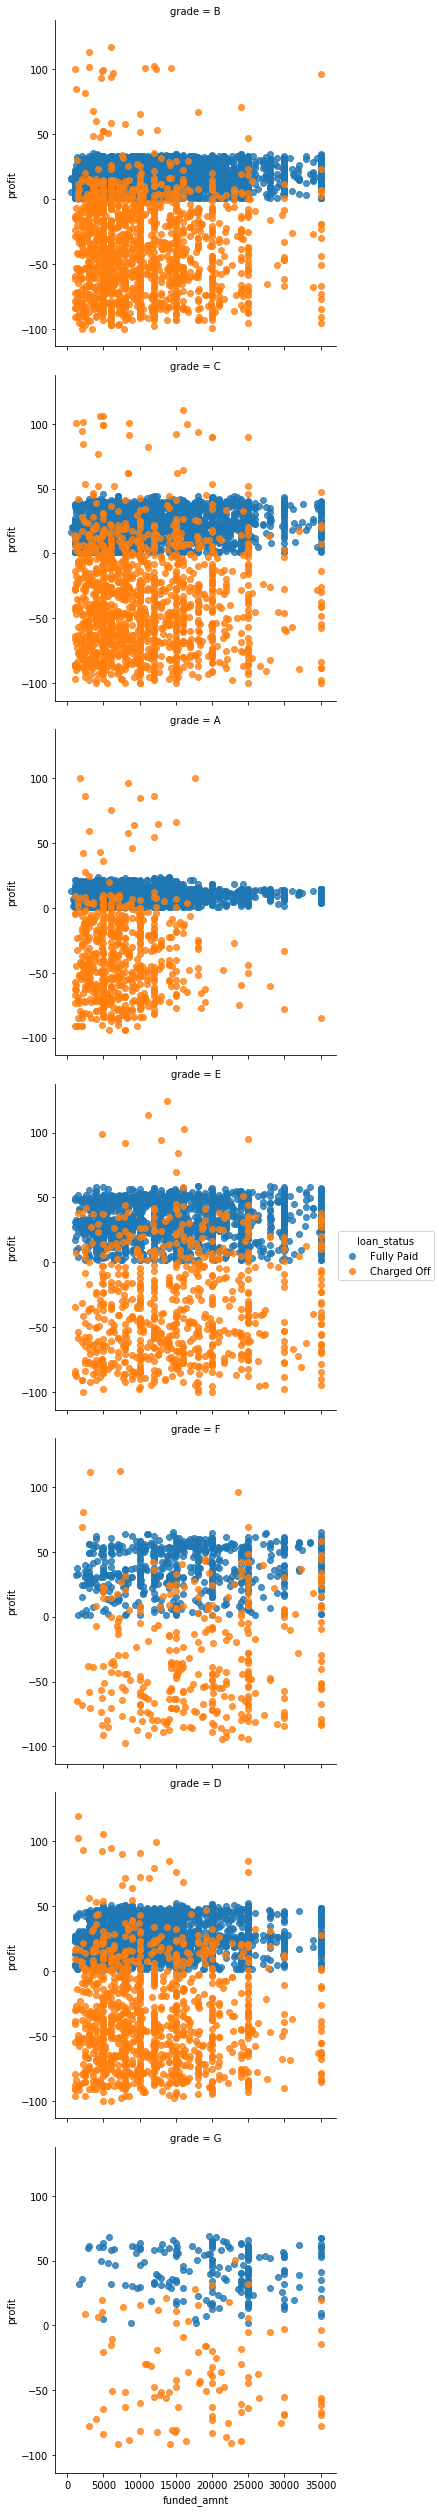

In [26]:
plt.figure(figsize=(15,15))

sns.lmplot(x='funded_amnt',y='profit',hue='loan_status',row='grade',fit_reg=False,data=loan_details_cleansed)

plt.show()


<Figure size 1080x1080 with 0 Axes>

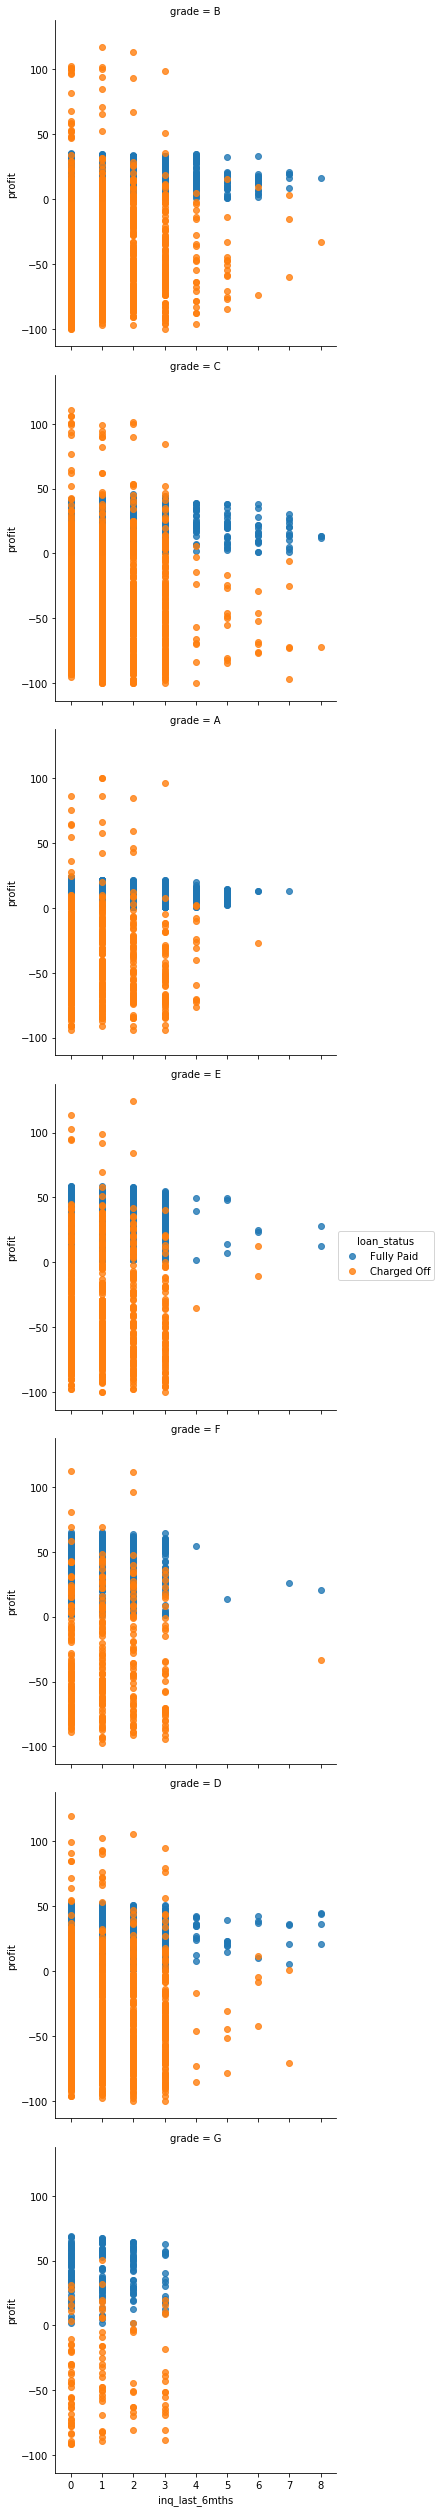

In [27]:
plt.figure(figsize=(15,15))

sns.lmplot(x='inq_last_6mths',y='profit',hue='loan_status',row='grade',fit_reg=False,data=loan_details_cleansed)

plt.show()



<Figure size 1080x3240 with 0 Axes>

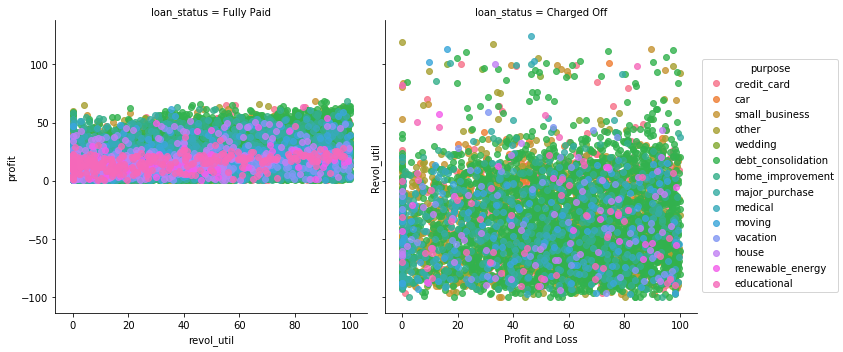

In [28]:
plt.figure(figsize=(15,45))


sns.lmplot(x='revol_util',y='profit',col='loan_status',hue='purpose',fit_reg=False,data=loan_details_cleansed)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")

plt.show()

In [29]:
D1=loan_details_cleansed.groupby(['emp_length','loan_status']).agg({'profit':'sum'})
print(D1)

                               profit
emp_length loan_status               
0.0        Charged Off  -23426.029367
           Fully Paid    68237.912993
1.0        Charged Off  -17451.564102
           Fully Paid    47736.416199
2.0        Charged Off  -21554.786435
           Fully Paid    67019.229728
3.0        Charged Off  -19899.989759
           Fully Paid    62662.286195
4.0        Charged Off  -18203.790391
           Fully Paid    52462.491348
5.0        Charged Off  -15983.046976
           Fully Paid    50082.284217
6.0        Charged Off  -12151.280753
           Fully Paid    35013.983178
7.0        Charged Off  -10130.664748
           Fully Paid    26933.464162
8.0        Charged Off   -6597.848608
           Fully Paid    21843.818387
9.0        Charged Off   -5462.971261
           Fully Paid    19298.395981
10.0       Charged Off  -46646.601104
           Fully Paid   133063.103853


In [30]:
D1=loan_details_cleansed.groupby(['grade','loan_status']).agg({'profit':'sum'})
print(D1)

                          profit
grade loan_status               
A     Charged Off  -22958.944398
      Fully Paid    93786.055838
B     Charged Off  -53767.048220
      Fully Paid   168243.412832
C     Charged Off  -51413.342123
      Fully Paid   137505.625595
D     Charged Off  -39692.818604
      Fully Paid   101501.115386
E     Charged Off  -25205.186472
      Fully Paid    63068.132606
F     Charged Off   -9792.570100
      Fully Paid    24827.871185
G     Charged Off   -3887.160757
      Fully Paid     8278.430638


In [31]:
D1=loan_details_cleansed.groupby(['emp_length','loan_status']).agg({'profit':'count'})
print(D1)

                        profit
emp_length loan_status        
0.0        Charged Off     639
           Fully Paid     3869
1.0        Charged Off     456
           Fully Paid     2713
2.0        Charged Off     567
           Fully Paid     3724
3.0        Charged Off     555
           Fully Paid     3457
4.0        Charged Off     462
           Fully Paid     2880
5.0        Charged Off     458
           Fully Paid     2736
6.0        Charged Off     307
           Fully Paid     1861
7.0        Charged Off     263
           Fully Paid     1448
8.0        Charged Off     203
           Fully Paid     1232
9.0        Charged Off     158
           Fully Paid     1068
10.0       Charged Off    1331
           Fully Paid     7157


In [32]:
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))
print(D2)

                        profit
emp_length loan_status        
0.0        Charged Off    14.2
           Fully Paid     85.8
1.0        Charged Off    14.4
           Fully Paid     85.6
2.0        Charged Off    13.2
           Fully Paid     86.8
3.0        Charged Off    13.8
           Fully Paid     86.2
4.0        Charged Off    13.8
           Fully Paid     86.2
5.0        Charged Off    14.3
           Fully Paid     85.7
6.0        Charged Off    14.2
           Fully Paid     85.8
7.0        Charged Off    15.4
           Fully Paid     84.6
8.0        Charged Off    14.1
           Fully Paid     85.9
9.0        Charged Off    12.9
           Fully Paid     87.1
10.0       Charged Off    15.7
           Fully Paid     84.3


In [33]:
# Profitibility vs %age default for employment length



# DF for default rates
default_purpose={'default_rate':{}}

for name in loan_details_cleansed.emp_length.dropna().unique():
    default_purpose['default_rate'][name]=D2['profit'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging Dataframes
D1=loan_details_cleansed.groupby(['emp_length']).agg({'profit':['median','mad']})

D3=pd.merge(D1['profit'],D2,left_index=True,right_index=True,how='inner')

print(D3.sort_values('default_rate'))


               median        mad  default_rate
emp_length                                    
9.0         14.483291  14.683788          12.9
2.0         15.482376  14.827094          13.2
3.0         15.244012  15.156734          13.8
4.0         14.431731  15.616310          13.8
8.0         14.258983  14.785526          14.1
0.0         14.661081  15.560039          14.2
6.0         15.332305  16.063619          14.2
5.0         14.904404  15.300360          14.3
1.0         15.177552  15.690566          14.4
7.0         15.237542  16.617656          15.4
10.0        14.596772  16.372988          15.7


In [34]:
# Profitibility vs %age default for Purpose


D1=loan_details_cleansed.groupby(['purpose','loan_status']).agg({'profit':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_details_cleansed.purpose.dropna().unique():
    default_purpose['default_rate'][name]=D2['profit'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_details_cleansed.groupby(['purpose']).agg({'profit':['median','mad']})

D3=pd.merge(D1['profit'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)


                       median        mad  default_rate
purpose                                               
major_purchase      12.297700  12.661786          10.3
wedding             15.444580  13.315296          10.4
car                 12.616894  11.885990          10.7
credit_card         15.234867  12.353665          10.8
home_improvement    13.603313  14.271655          12.1
vacation            12.617524  14.483763          14.1
debt_consolidation  15.853882  16.396987          15.3
medical             12.614708  17.686995          15.6
moving              13.694316  16.533874          16.0
house               12.612134  16.859143          16.1
other               14.298757  16.992992          16.4
educational         15.156228  16.588851          17.2
renewable_energy    12.335686  16.183766          18.6
small_business      13.577206  26.106053          27.1


In [35]:

D1=loan_details_cleansed.groupby(['addr_state','loan_status']).agg({'profit':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_details_cleansed.addr_state.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['profit'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)



# Merging default dataframe with median and mad
D1=loan_details_cleansed.groupby(['addr_state']).agg({'profit':['median','mad']})

D3=pd.merge(D1['profit'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)


               median        mad default_rate
addr_state                                   
WY          16.969237   9.305463            5
DC          15.972965  10.761012          7.1
MS          17.498898  14.312764         10.5
DE          16.009597  14.144039         10.6
VT          13.826116  14.536516         11.3
AR          13.792629  13.005836         11.5
TN          15.235856  11.464400         11.8
TX          15.234365  13.905012         11.9
KS          14.371303  14.166826         12.2
WV          16.262279  14.749352         12.2
MA          14.286249  13.673670         12.3
PA          15.007646  13.933492         12.3
AL          15.087802  13.254334         12.4
LA          14.692586  13.364565         12.4
CO          14.311385  13.869703         12.8
VA          14.879854  13.822018         12.9
CT          14.377097  14.833620         12.9
RI          14.183572  13.356038         12.9
OH          15.681479  15.319343         13.2
MT          12.687191  14.602432  

<Figure size 3240x3240 with 0 Axes>

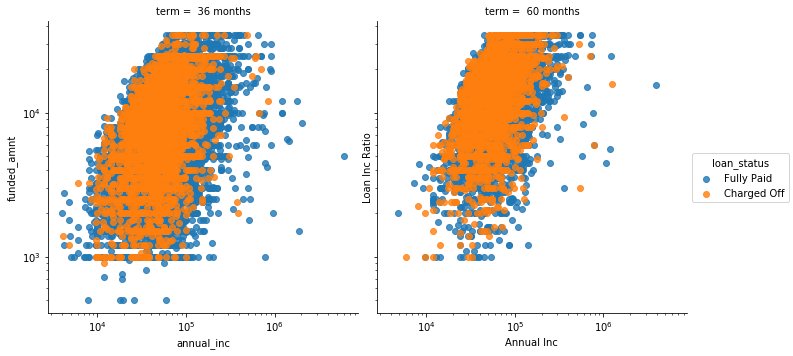

In [36]:
#Annual Income comparison with the terms and Loan Status

loan_details_cleansed.corr()
plt.figure(figsize=(45,45))


fgrid=sns.lmplot(y='funded_amnt',x='annual_inc',fit_reg=False,hue='loan_status',col='term',data=loan_details_cleansed)
ax=fgrid.axes[0][0]
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Loan Inc Ratio")
plt.xlabel("Annual Inc")

plt.show()


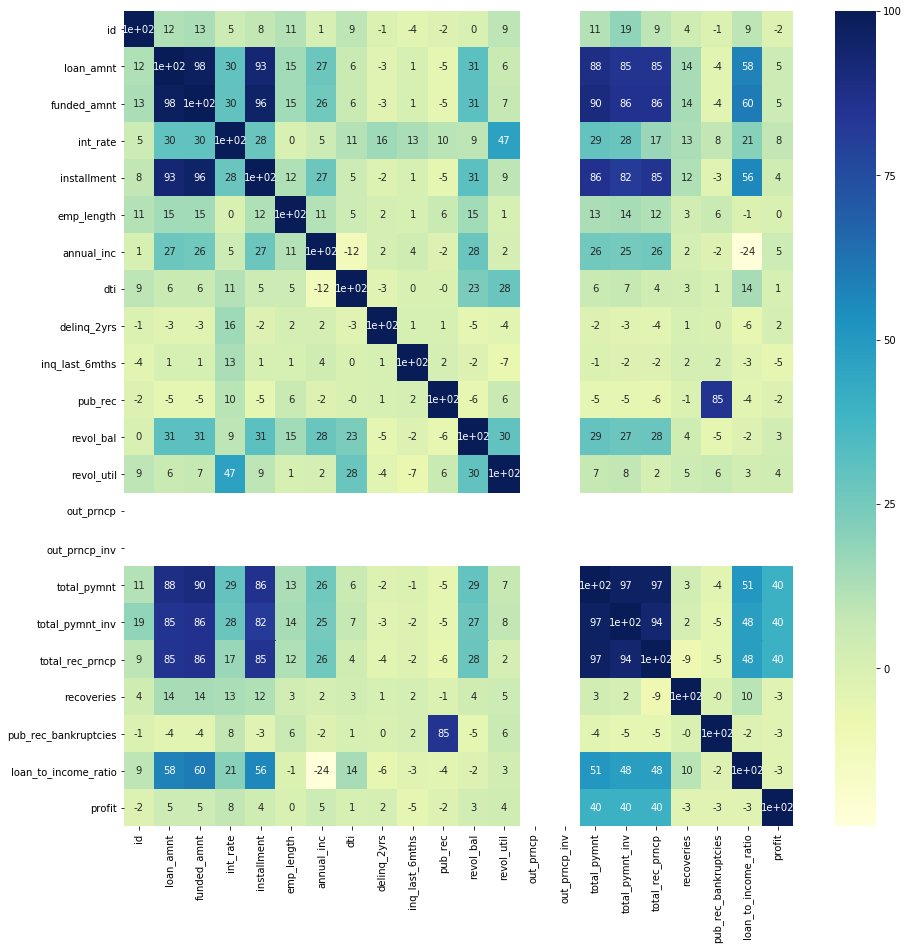

In [37]:
#Correlation across measures

plt.figure(figsize=(15,15))
sns.heatmap(round(loan_details_cleansed.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()


In [38]:

D1=loan_details_cleansed.groupby(['inq_last_6mths','loan_status']).agg({'profit':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

print(D2)

                            profit
inq_last_6mths loan_status        
0              Charged Off    12.2
               Fully Paid     87.8
1              Charged Off    15.7
               Fully Paid     84.3
2              Charged Off    16.7
               Fully Paid     83.3
3              Charged Off    20.8
               Fully Paid     79.2
4              Charged Off    16.1
               Fully Paid     83.9
5              Charged Off    19.4
               Fully Paid     80.6
6              Charged Off    25.4
               Fully Paid     74.6
7              Charged Off    29.4
               Fully Paid     70.6
8              Charged Off    21.4
               Fully Paid     78.6


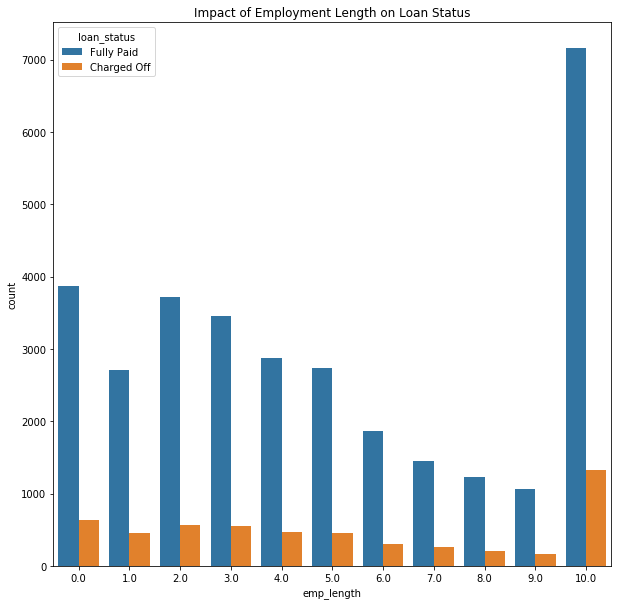

In [39]:
drop_columns2=['installment','term','total_pymnt_inv','total_rec_prncp']

loan_details_cleansed=loan_details_cleansed.drop(drop_columns2,axis=1)

plt.figure(figsize=(10,10))
sns.countplot('emp_length',hue='loan_status',data=loan_details_cleansed)
plt.title("Impact of Employment Length on Loan Status")
plt.show()

In [40]:
# New column for Binning the Funded Amounts
loan_details_cleansed['funded_amnt_bins']=pd.cut(loan_details_cleansed['funded_amnt'],4)

#Profit acriss the bins
print(loan_details_cleansed.groupby(['grade','funded_amnt_bins'])['profit'].median())



grade  funded_amnt_bins  
A      (465.5, 9125.0]       10.079991
       (9125.0, 17750.0]     10.403829
       (17750.0, 26375.0]    10.739736
       (26375.0, 35000.0]    11.850538
B      (465.5, 9125.0]       16.144762
       (9125.0, 17750.0]     16.380638
       (17750.0, 26375.0]    16.589518
       (26375.0, 35000.0]    17.087790
C      (465.5, 9125.0]       20.478192
       (9125.0, 17750.0]     20.743615
       (17750.0, 26375.0]    21.025330
       (26375.0, 35000.0]    22.120968
D      (465.5, 9125.0]       23.429162
       (9125.0, 17750.0]     23.591878
       (17750.0, 26375.0]    23.846526
       (26375.0, 35000.0]    21.850866
E      (465.5, 9125.0]       26.561313
       (9125.0, 17750.0]     26.897762
       (17750.0, 26375.0]    26.585832
       (26375.0, 35000.0]    29.657035
F      (465.5, 9125.0]       26.888378
       (9125.0, 17750.0]     30.615395
       (17750.0, 26375.0]    27.189745
       (26375.0, 35000.0]    31.644951
G      (465.5, 9125.0]       16.876718

In [41]:
# New column for Binning the DTI bins

loan_details_cleansed['dti_bins']= pd.cut(loan_details_cleansed['dti'],3)

#Profit across the bins
print(loan_details_cleansed.groupby(['grade','dti_bins'])['profit'].median())



grade  dti_bins       
A      (-0.03, 9.997]      9.743728
       (9.997, 19.993]    10.529248
       (19.993, 29.99]    10.532254
B      (-0.03, 9.997]     15.985034
       (9.997, 19.993]    16.450848
       (19.993, 29.99]    16.591865
C      (-0.03, 9.997]     20.289641
       (9.997, 19.993]    20.743615
       (19.993, 29.99]    20.850136
D      (-0.03, 9.997]     23.031016
       (9.997, 19.993]    23.787481
       (19.993, 29.99]    23.564120
E      (-0.03, 9.997]     26.490882
       (9.997, 19.993]    27.128080
       (19.993, 29.99]    27.136450
F      (-0.03, 9.997]     28.301043
       (9.997, 19.993]    28.533496
       (19.993, 29.99]    32.292210
G      (-0.03, 9.997]     28.634479
       (9.997, 19.993]    29.860467
       (19.993, 29.99]    29.093267
Name: profit, dtype: float64


In [42]:
loan_details_cleansed['revol_util_bins']= pd.cut(loan_details_cleansed['revol_util'],3)
print(loan_details_cleansed.groupby(['grade','revol_util_bins'])['profit'].median())



grade  revol_util_bins
A      (-0.0999, 33.3]     9.567909
       (33.3, 66.6]       10.767970
       (66.6, 99.9]       11.367658
B      (-0.0999, 33.3]    15.965280
       (33.3, 66.6]       16.475028
       (66.6, 99.9]       16.590396
C      (-0.0999, 33.3]    20.136314
       (33.3, 66.6]       20.625660
       (66.6, 99.9]       20.847934
D      (-0.0999, 33.3]    21.714012
       (33.3, 66.6]       23.633729
       (66.6, 99.9]       23.866863
E      (-0.0999, 33.3]    25.261853
       (33.3, 66.6]       27.186175
       (66.6, 99.9]       27.127566
F      (-0.0999, 33.3]    28.351828
       (33.3, 66.6]       29.666093
       (66.6, 99.9]       29.521752
G      (-0.0999, 33.3]   -17.968333
       (33.3, 66.6]       24.173235
       (66.6, 99.9]       31.697360
Name: profit, dtype: float64


Text(0.5,1,'Funded amount vs Home Ownership relationship')

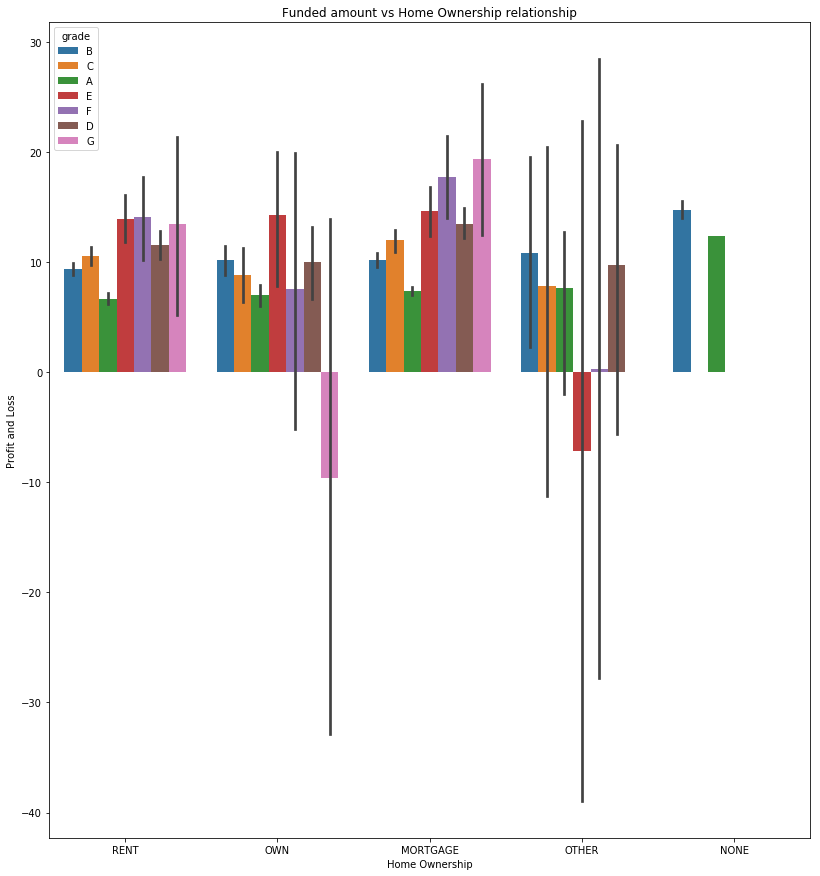

In [43]:
plt.figure(figsize=(30,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='profit',data=loan_details_cleansed,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")


Text(0.5,1,'Funded amount vs Purpose relationship')

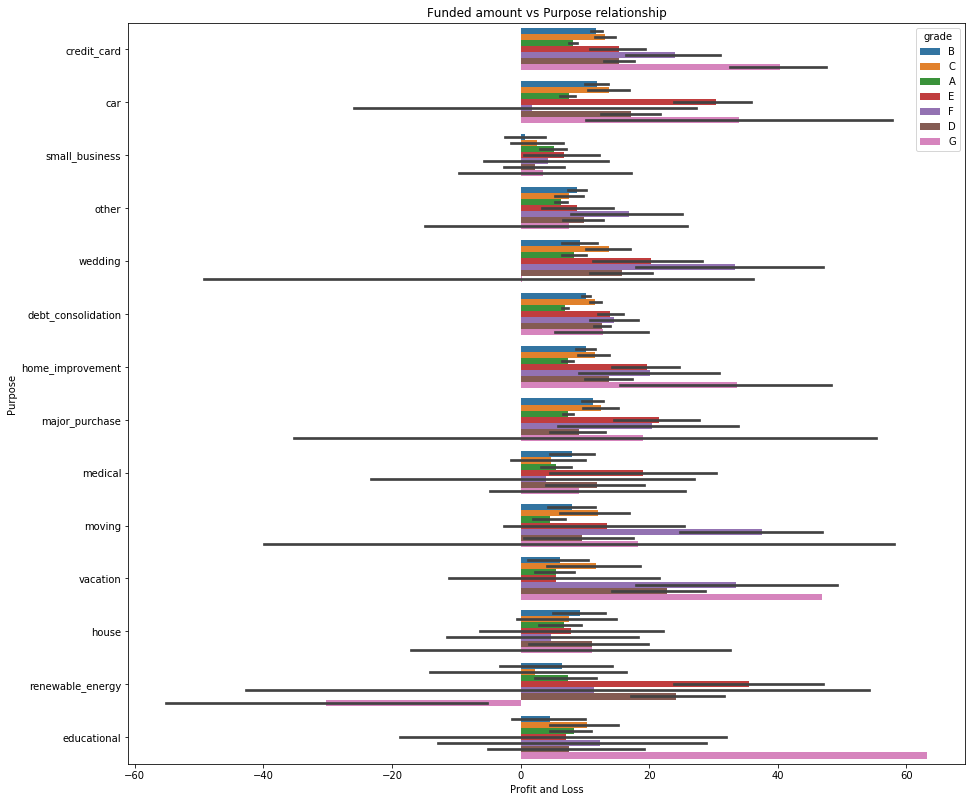

In [44]:
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='purpose',x='profit',data=loan_details_cleansed,hue='grade')
plt.ylabel("Purpose")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")
